In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

### 데이터 준비

In [55]:
groceries = pd.read_csv('groceries.csv')
groceries

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
## 각 행을 리스트로 변환하여 트랜잭션 데이터 생성
transactions = groceries.stack().groupby(level=0).apply(list).tolist()
transactions = [[str(item) for item in transaction] for transaction in transactions]
transactions

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

In [37]:
## 데이터 요약 통계량 확인
item_counts = pd.Series([item for sublist in transactions for item in sublist])
item_counts.describe()

count          43367
unique           169
top       whole milk
freq            2513
dtype: object

### 아이템 빈도 확인

In [38]:
## 트랜잭션 데이터를 One-Hot Encoding 형태로 변환
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
groceries_df = pd.DataFrame(te_ary, columns=te.columns_)

## 각 아이템 빈도 계산 (절대 빈도)
item_freq_abs = groceries_df.sum().sort_values(ascending=False)
print("\n아이템 빈도 (절대 빈도):")
print(item_freq_abs)

## 각 아이템 빈도 계산 (상대 빈도)
item_freq_rel = (groceries_df.mean()).sort_values(ascending=False)
item_freq_rel = item_freq_rel.round(3)
print("\n아이템 빈도 (상대 빈도):")
print(item_freq_rel)


아이템 빈도 (절대 빈도):
whole milk               2513
other vegetables         1903
rolls/buns               1809
soda                     1715
yogurt                   1372
                         ... 
bags                        4
kitchen utensil             4
preservation products       2
baby food                   1
sound storage medium        1
Length: 169, dtype: int64

아이템 빈도 (상대 빈도):
whole milk               0.256
other vegetables         0.193
rolls/buns               0.184
soda                     0.174
yogurt                   0.140
                         ...  
bags                     0.000
kitchen utensil          0.000
preservation products    0.000
baby food                0.000
sound storage medium     0.000
Length: 169, dtype: float64


### 아이템 빈도 시각화

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_1660\772781916.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_freq_abs.head(10).values, y=item_freq_abs.head(10).index, palette='viridis')


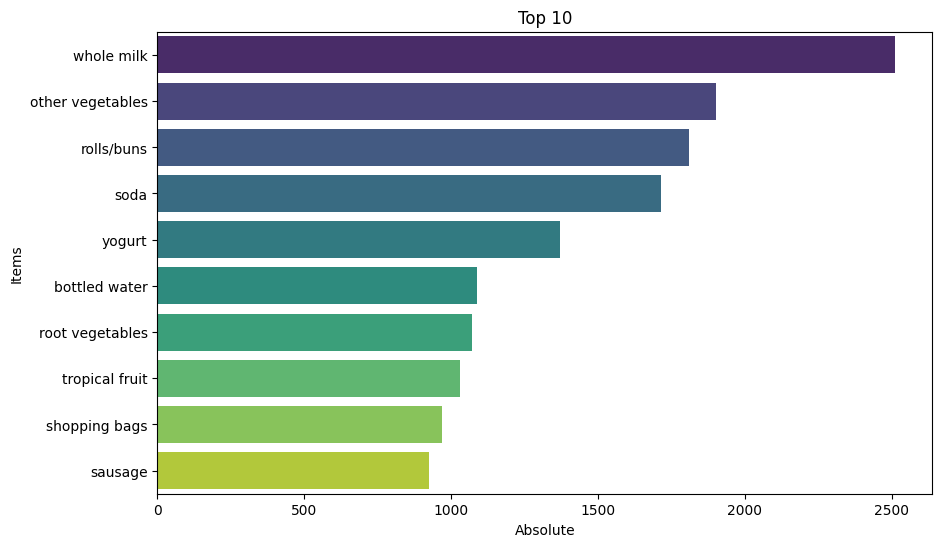

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_1660\772781916.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_freq_rel.head(10).values, y=item_freq_rel.head(10).index, palette='magma')


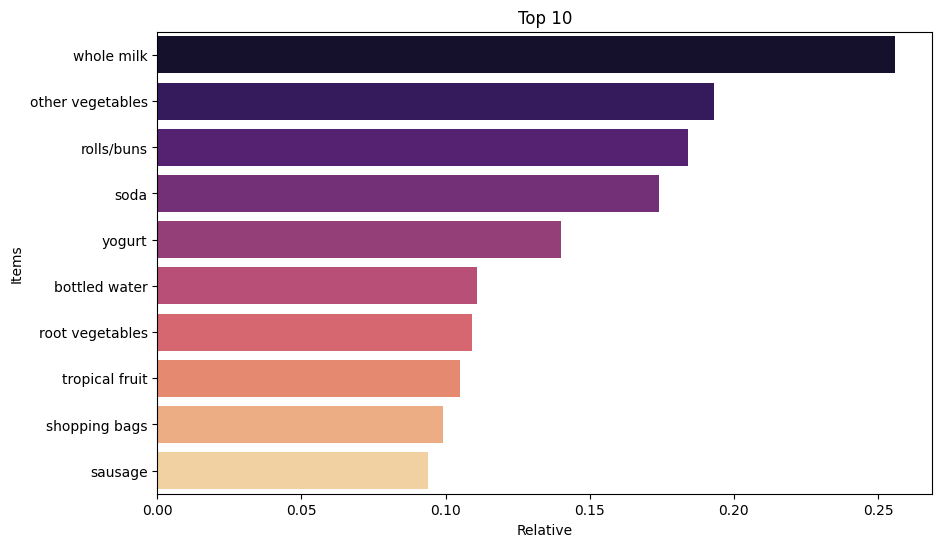

In [49]:
## 절대 빈도 상위 10개 아이템 시각화
plt.figure(figsize=(10,6))
sns.barplot(x=item_freq_abs.head(10).values, y=item_freq_abs.head(10).index, palette='viridis')
plt.title('Top 10')
plt.xlabel('Absolute')
plt.ylabel('Items')
plt.show()

## 상대 빈도 상위 10개 아이템 시각화
plt.figure(figsize=(10,6))
sns.barplot(x=item_freq_rel.head(10).values, y=item_freq_rel.head(10).index, palette='magma')
plt.title('Top 10')
plt.xlabel('Relative')
plt.ylabel('Items')
plt.show()


### 연관성 분석


연관규칙 요약:
               antecedents   consequents  antecedent support  \
0          (baking powder)  (whole milk)            0.017692   
1       (rolls/buns, beef)  (whole milk)            0.013625   
2           (beef, yogurt)  (whole milk)            0.011693   
3   (bottled beer, yogurt)  (whole milk)            0.009253   
4  (butter, bottled water)  (whole milk)            0.008948   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.255516  0.009253    0.522989  2.046793  0.004732    1.560725   
1            0.255516  0.006812    0.500000  1.956825  0.003331    1.488968   
2            0.255516  0.006101    0.521739  2.041904  0.003113    1.556648   
3            0.255516  0.005186    0.560440  2.193364  0.002821    1.693701   
4            0.255516  0.005389    0.602273  2.357084  0.003103    1.871845   

   zhangs_metric  
0       0.520642  
1       0.495722  
2       0.516298  
3       0.549160  
4       0.580945  


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_1660\3956437794.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='length', data=rules, palette='coolwarm')


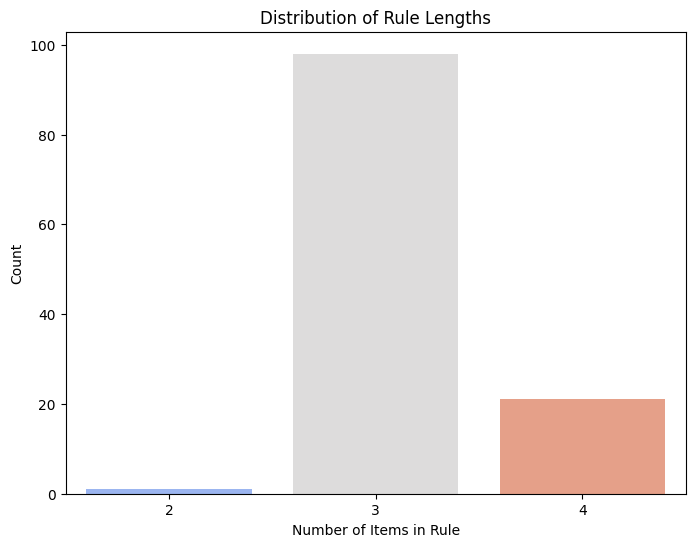

In [40]:
## Apriori 알고리즘을 사용하여 빈발 아이템셋 생성
frequent_itemsets = apriori(groceries_df, min_support=0.005, use_colnames=True)

## 규칙 생성
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

## 규칙 요약
print("\n연관규칙 요약:")
print(rules.head())

## 규칙 길이 분포 확인 (항목의 수에 따른 규칙 분포)
rules['length'] = rules['antecedents'].apply(lambda x: len(x)) + rules['consequents'].apply(lambda x: len(x))
plt.figure(figsize=(8,6))
sns.countplot(x='length', data=rules, palette='coolwarm')
plt.title('Distribution of Rule Lengths')
plt.xlabel('Number of Items in Rule')
plt.ylabel('Count')
plt.show()

In [41]:
## 향상도(lift) 기준으로 규칙 정렬
rules_lift = rules.sort_values(by='lift', ascending=False)
print("\n향상도 기준 상위 5개 규칙:")
print(rules_lift[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))

## 신뢰도(confidence) 기준으로 규칙 정렬
rules_conf = rules.sort_values(by='confidence', ascending=False)
print("\n신뢰도 기준 상위 5개 규칙:")
print(rules_conf[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))



향상도 기준 상위 5개 규칙:
                                     antecedents         consequents  \
34                        (tropical fruit, curd)            (yogurt)   
99   (citrus fruit, whole milk, root vegetables)  (other vegetables)   
103     (pip fruit, whole milk, root vegetables)  (other vegetables)   
67               (pip fruit, whipped/sour cream)  (other vegetables)   
63                     (onions, root vegetables)  (other vegetables)   

      support  confidence      lift  
34   0.005287    0.514851  3.690645  
99   0.005796    0.633333  3.273165  
103  0.005491    0.613636  3.171368  
67   0.005592    0.604396  3.123610  
63   0.005694    0.602151  3.112008  

신뢰도 기준 상위 5개 규칙:
                                        antecedents   consequents   support  \
119       (tropical fruit, yogurt, root vegetables)  (whole milk)  0.005694   
104  (pip fruit, root vegetables, other vegetables)  (whole milk)  0.005491   
16                     (butter, whipped/sour cream)  (whole milk) 

In [44]:
## 특정 아이템 부분집합: 'whole milk'이 포함된 규칙
# 'whole milk'가 데이터에 존재하는지 확인
if 'whole milk' in groceries_df.columns:
    ## 'whole milk'를 포함하는 규칙 (antecedents에 'whole milk' 포함)
    milk_rule = rules_lift[rules_lift['antecedents'].apply(lambda x: 'whole milk' in x)]
    print("\n'whole milk'을 포함하는 상위 5개 규칙:")
    print(milk_rule[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))
    
    ## RHS에 'whole milk'가 포함된 규칙
    rhs_milk_rule = rules_lift[rules_lift['consequents'].apply(lambda x: 'whole milk' in x)]
    print("\nRHS에 'whole milk'을 포함하는 상위 5개 규칙:")
    print(rhs_milk_rule[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))
    
    ## 특정 아이템을 RHS로 하는 규칙 생성
    wholemilk_rule = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
    wholemilk_rule = wholemilk_rule[wholemilk_rule['consequents'] == frozenset(['whole milk'])]
    wholemilk_rule = wholemilk_rule.sort_values(by='lift', ascending=False)
    print("\nRHS가 'whole milk'인 상위 5개 규칙:")
    print(wholemilk_rule[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))


'whole milk'을 포함하는 상위 5개 규칙:
                                           antecedents         consequents  \
99         (citrus fruit, whole milk, root vegetables)  (other vegetables)   
103           (pip fruit, whole milk, root vegetables)  (other vegetables)   
109      (whole milk, tropical fruit, root vegetables)  (other vegetables)   
111  (whole milk, whipped/sour cream, root vegetables)  (other vegetables)   
64                                (whole milk, onions)  (other vegetables)   

      support  confidence      lift  
99   0.005796    0.633333  3.273165  
103  0.005491    0.613636  3.171368  
109  0.007016    0.584746  3.022057  
111  0.005186    0.548387  2.834150  
64   0.006609    0.546218  2.822942  

RHS에 'whole milk'을 포함하는 상위 5개 규칙:
                                        antecedents   consequents   support  \
119       (tropical fruit, yogurt, root vegetables)  (whole milk)  0.005694   
104  (pip fruit, root vegetables, other vegetables)  (whole milk)  0.005491   
1

### 연관 분석 결과 시각화

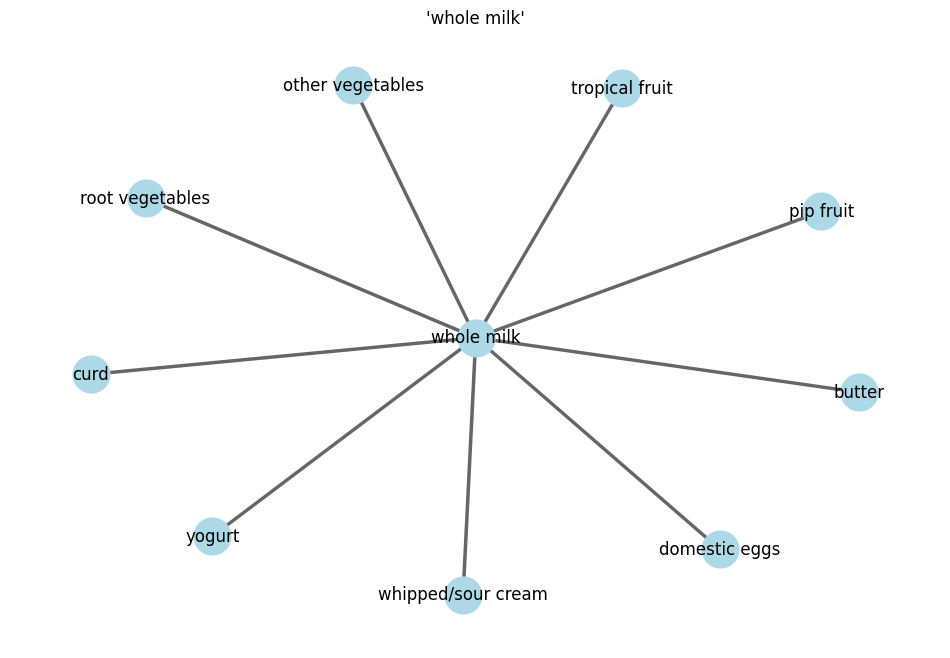

In [48]:
## 'whole milk' 관련 규칙 시각화 (상위 10개)
if 'whole milk' in groceries_df.columns:
    top_rules = wholemilk_rule.head(10)
    
    ## 네트워크 그래프를 그리기 위해 데이터 준비
    import networkx as nx
    G = nx.Graph()
    
    for _, row in top_rules.iterrows():
        for antecedent in row['antecedents']:
            for consequent in row['consequents']:
                G.add_edge(antecedent, consequent, weight=row['lift'])
    
    plt.figure(figsize=(12,8))
    pos = nx.spring_layout(G, k=0.5, seed=42)  # seed 설정으로 레이아웃 일관성 확보
    edges = G.edges(data=True)
    weights = [edge[2]['weight'] for edge in edges]
    
    ## 엣지의 두께를 lift 값에 비례하도록 설정
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, width=[weight for weight in weights], alpha=0.6)
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
    
    ## 연관 규칙
    plt.title("'whole milk'")
    plt.axis('off')
    plt.show()